# Generating random controls. 

This is an example notebook to show how to generate control models of a given parametrized connnectome. 

Models included are: 
* Erdos Renyi, 
* Stochastic Block Model, 
* Distance Dependant (2nd order), 
* Distance Dependant (3rd order)
* Configuration model 

Output of functions is a matrix in coo format stored as a dictionary with two entries ['row'] and ['col'], or as scipy sparse in csr format

In [1]:
import numpy as np
import pandas
import scipy.sparse as sp
import matplotlib.pyplot as plt
from connalysis import randomization
from connalysis.network import topology

### Models based on pre-computed parameters

In [2]:
# Erdos-Renyi model:
# Input: n, p, threads
#    n = number of vertices (int)
#    p = edge probability (double)
#    threads = number of threads to use (int)
#    seed: random seed to be used, if none is provided a seed is randomly selected
# Example
n = 100
p = 0.5
threads = 8
A = randomization.run_ER(n, p, threads=8, seed=(None,None))

In [3]:
# Stochastic Block Model model:
# Input: n, pathways, mtypes, threads
#    n = number of vertices (int)
#    M = M[i][j] entry is probability of edge between mtype i and mtype j (numpy array, shape=(m,m), dtype=float64), where m is number of mtypes
#    mtypes = i'th entry is mtype of vertex i (numpy array, shape=(n,), dtype=uint8)
#    threads = number of threads to use (int)
# Example
n = 100
m = 10
pathways = np.random.rand(m,m)
mtypes = np.random.randint(m,size=(n,))
threads = 8

B = randomization.run_SBM(n, pathways, mtypes, threads)

In [4]:
# Distance Dependant
# Input: n, a, b, xyz, threads
#    n = number of vertices (int)
#    a = coefficient of probability function (double)
#    b = coefficient of probability function (double)
#    xyz = the coordinates of the vertices, (numpy array, shape=(n,3), dtype=float64)
#    threads = number of threads to use (int)
# Example
n = 100
a = 0.085
b = -0.005
xyz = np.random.rand(n,3)
threads = 8

In [5]:
# Distance Dependant
# Input: n, a, b, xyz, threads
#    n = number of vertices (int)
#    a = coefficient of probability function (double)
#    b = coefficient of probability function (double)
#    xyz = the coordinates of the vertices, (numpy array, shape=(n,3), dtype=float64)
#    threads = number of threads to use (int)
# Example
n = 100
a = 0.085
b = 0.005
xyz = np.random.rand(n,3)
threads = 8

C =  randomization.run_DD2(n,a,b,xyz,threads)

In [6]:
# Distance Dependant (3rd order)
# Input: n, a, b, xyz, threads
#    n = number of vertices (int)
#    a1 = coefficient of probability function for dz<0 (double)
#    b1 = coefficient of probability function for dz<0 (double)
#    a2 = coefficient of probability function for dz>0 (double)
#    b2 = coefficient of probability function for dz>0 (double)
#    xyz = the coordinates of the vertices, (numpy array, shape=(n,3), dtype=float64)
#    depths = i'th entry is depth of vertex i (numpy array, shape=(n,), dtype=float64)
#    threads = number of threads to use (int)
# Example
n = 100
a1 = 0.089
b1 = -0.003
a2 = 0.091
b2 = -0.008
xyz = np.random.rand(n,3)
depths = np.random.rand(n)
threads = 8

D = randomization.run_DD3(n,a1,b1,a2,b2,xyz,depths,threads)

### Models based on a given connectome directly 

In [10]:
# Load example data (adjacency matrix & neuron properties table)
adj_file = './adj_r0c10.npz'
A = sp.load_npz(adj_file)
CM=randomization.configuration_model(A.tocoo(),1)
print(f"The configuration model control has {CM.sum()*100/A.sum():.2f}% of the edges of the original connectome")


The configuration model control has 99.99% of the edges of the original connectome


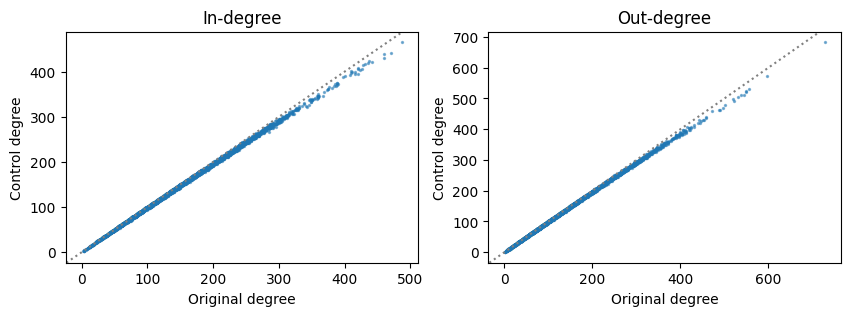

In [11]:
# Checking that the degree sequences match 
dtypes=["IN", "OUT"]
degA=topology.node_degree(A,direction=tuple(dtypes))
degCM=topology.node_degree(CM,direction=("IN", "OUT"))
fig, axs = plt.subplots(1,2,figsize=(10,3))
axs[0].set_title("In-degree")
axs[1].set_title("Out-degree")
for i, dtype in enumerate(dtypes):
    axs[i].axline((0, 0), slope=1, c="grey", linestyle="dotted")
    axs[i].scatter(degA[dtype], degCM[dtype], s=2, alpha=0.5)
    axs[i].set_xlabel("Original degree")    
    axs[i].set_ylabel("Control degree")